In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from protozfits import SimpleFile
from pedestal import PedestalSimple, remove_pedestal
from event import Event
from tools import plot_hist

plt.rcParams.update({'font.size': 35})



In [2]:
N1 = 15000
f1 = SimpleFile("../data/Run021.1.fits.fz")
ped = PedestalSimple()

for i in range(0, N1):
    ev = next(f1.Events)
    Ev = Event(ev)
    Ev.read()
    ped.fill_pedestal_event(Ev)

ped.finalize_pedestal()

Not enough events. Error:  invalid value encountered in sqrt


In [ ]:
x = np.linspace(1, 1024, 1024)

plt.errorbar(x, ped.mean_value_channel_high_gain[0, :1024], yerr=ped.rms_high_gain[0, :1024], fmt='o', color="blue")
plt.xlabel("DRS 4 kondensator")
plt.ylabel("Offset komórkki wraz z RMS")
plt.grid(True)
plt.show()

In [3]:
def plot_spike(data_before_remove_spike, data_after_remove_spike):
    t = np.arange(2, 38, 1)
    fig, ax1 = plt.subplots(2, 1)

    ax1[0].step(t, data_before_remove_spike, 'b-', lw=4)
    ax1[0].set_ylim([-20, 50])
    ax1[0].set_ylabel("sygnał")
    ax1[0].set_xlabel("czas [ns]")
    ax1[0].grid(True)
    
    ax1[1].step(t, data_after_remove_spike, 'b-', lw=4)
    ax1[1].set_ylim([-20, 50])
    ax1[1].set_ylabel("sygnał")
    ax1[1].set_xlabel("czas [ns]")
    ax1[1].grid(True)
    plt.show()
    

spike b
 i =  28


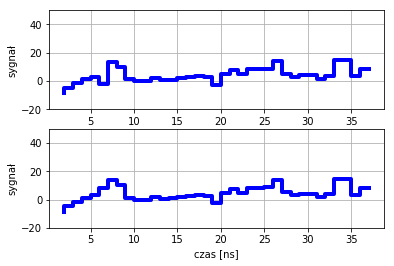

spike b
 i =  29


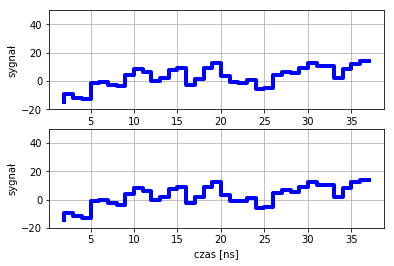

spike b
 i =  30


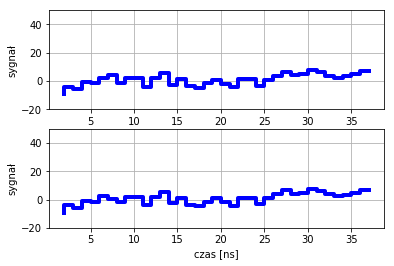

spike b
 i =  31


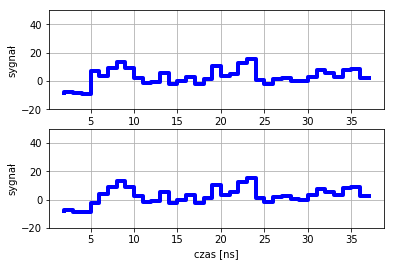

spike b
 i =  32


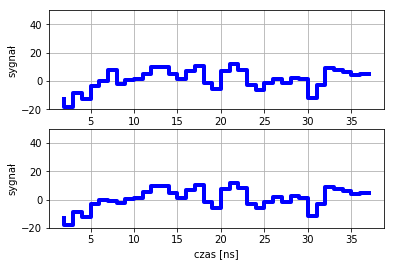

spike b
 i =  33


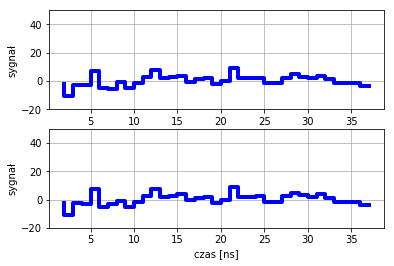

spike b
 i =  34


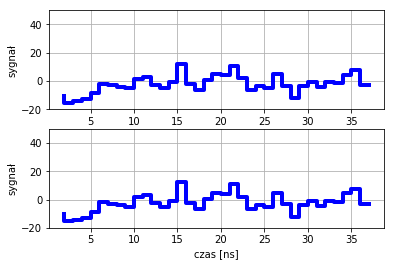

spike b
 i =  35


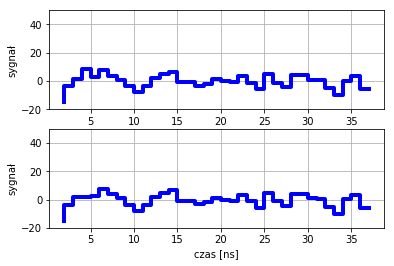

spike b
 i =  36


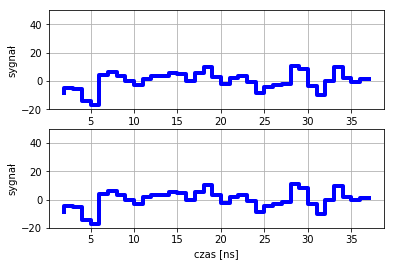

spike b
 i =  37


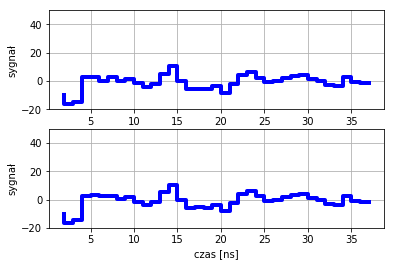

spike b
 i =  38


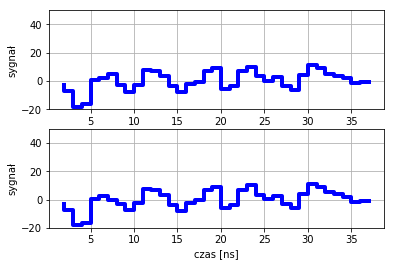

spike b
 i =  39


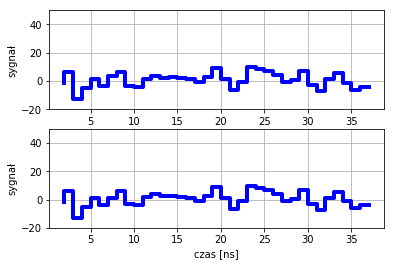

spike b
 i =  40


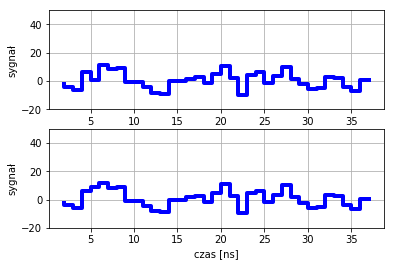

spike b
 i =  41


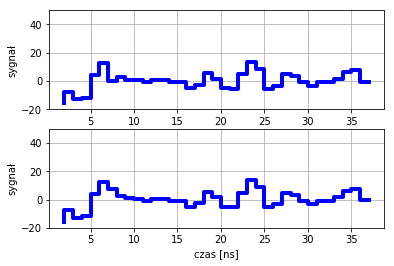

spike b
 i =  42


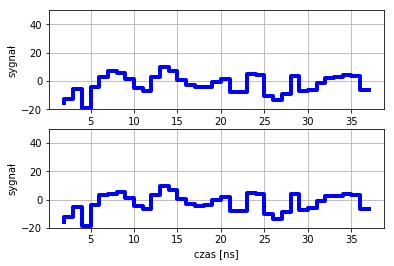

spike b
 i =  43


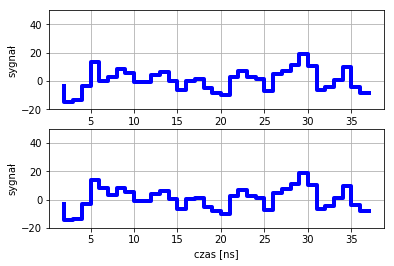

spike b
 i =  44


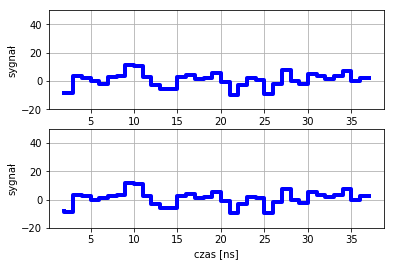

spike b
 i =  45


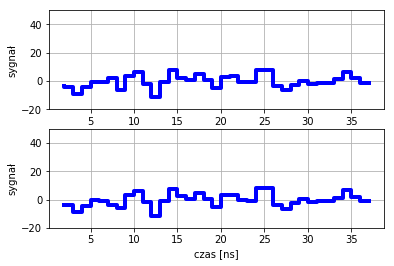

spike b
 i =  46


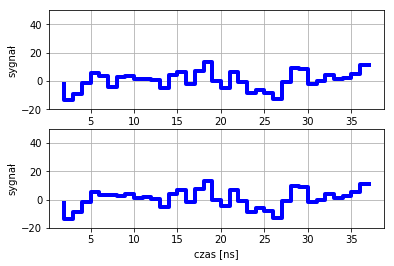

spike b
 i =  47


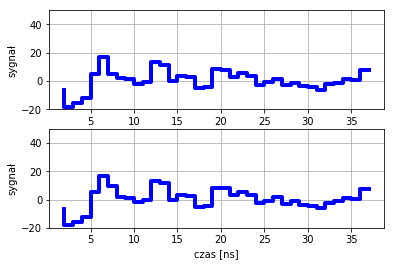

spike b
 i =  48


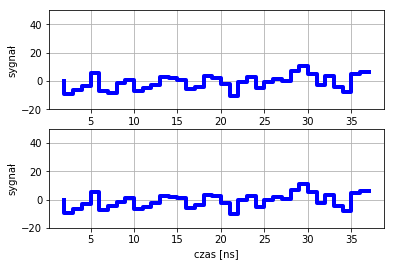

spike b
 i =  49


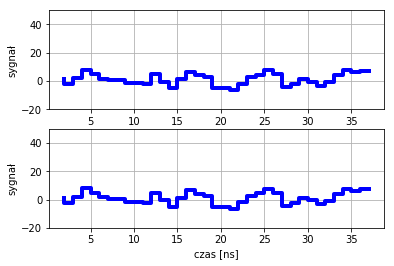

spike b
 i =  50


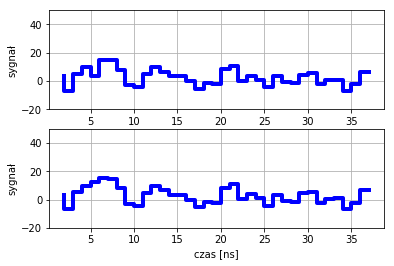

spike b
 i =  51


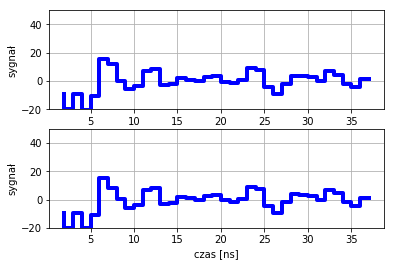

spike b
 i =  52


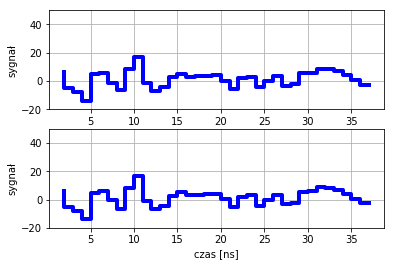

spike b
 i =  53


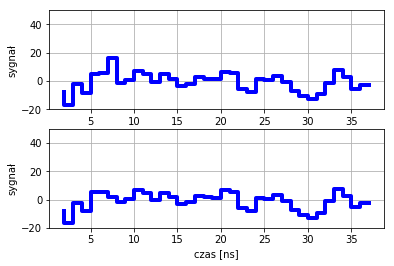

spike b
 i =  54


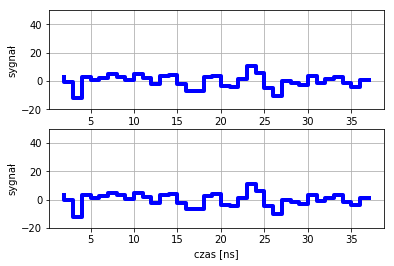

spike b
 i =  55


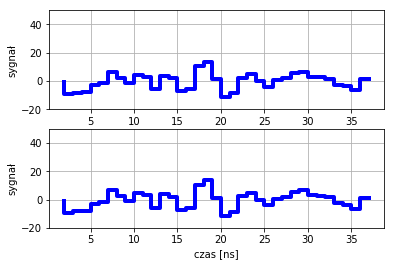

spike b
 i =  56


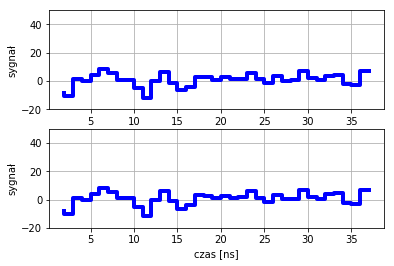

spike b
 i =  57


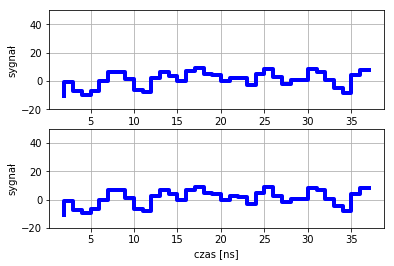

spike b
 i =  58


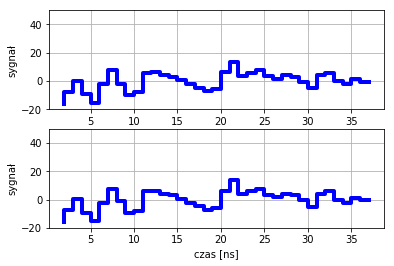

spike b
 i =  59


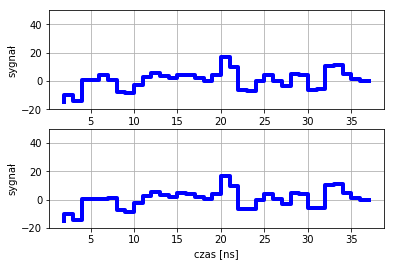

spike b
 i =  60


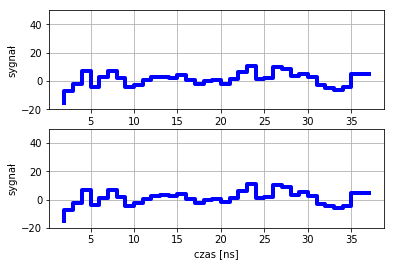

spike b
 i =  61


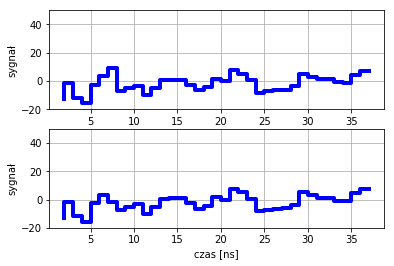

spike b
 i =  62


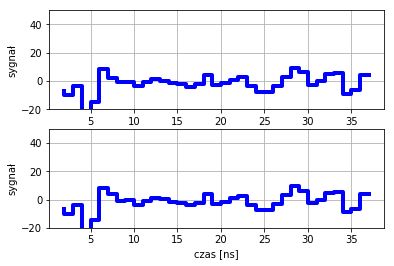

spike b
 i =  63


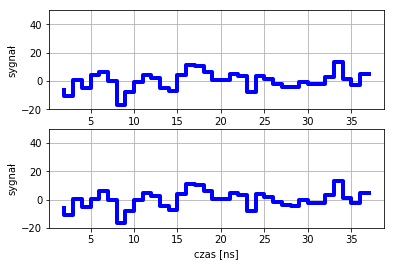

spike b
 i =  64


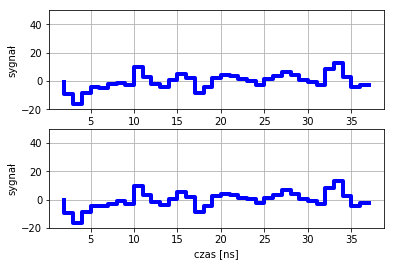

spike b
 i =  65


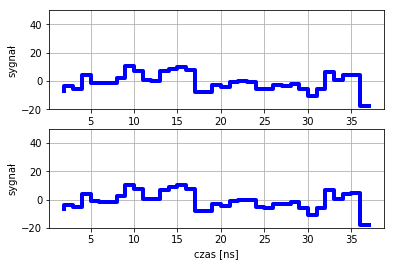

spike b
 i =  66


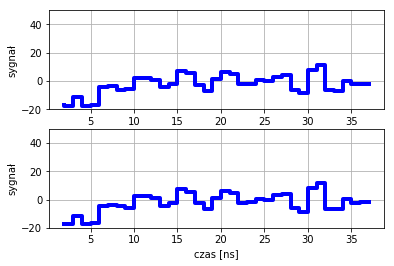

spike b
 i =  67


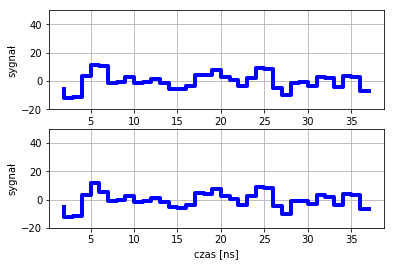

spike b
 i =  68


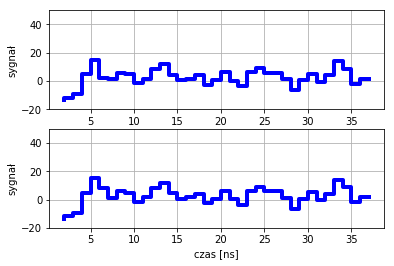

spike b
 i =  69


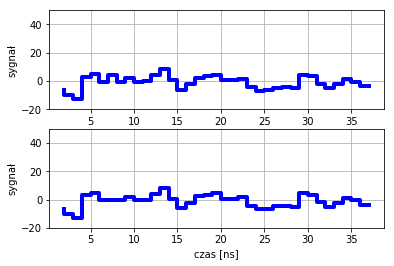

spike b
 i =  70


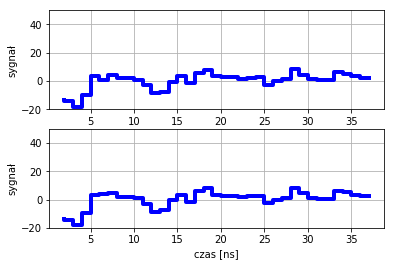

Spike A
i=  71


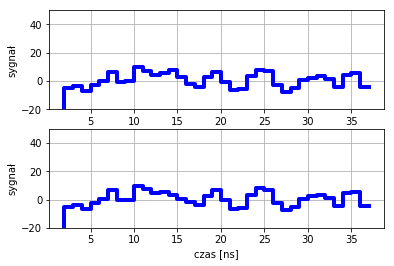

spike b
 i =  71


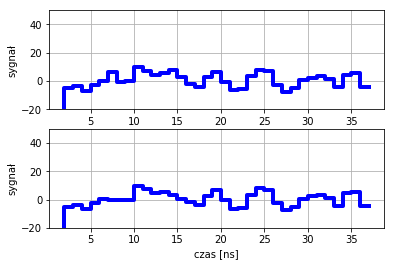

Spike A
i=  72


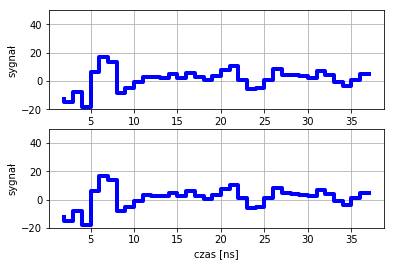

spike b
 i =  72


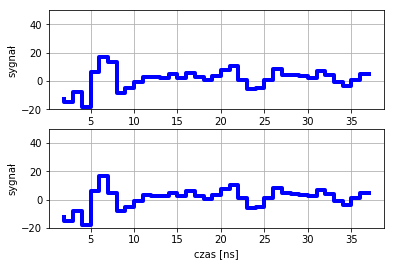

spike b
 i =  73


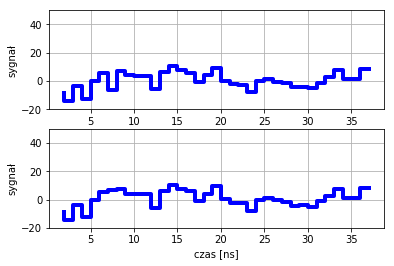

spike b
 i =  74


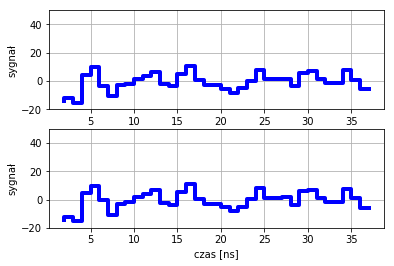

spike b
 i =  75


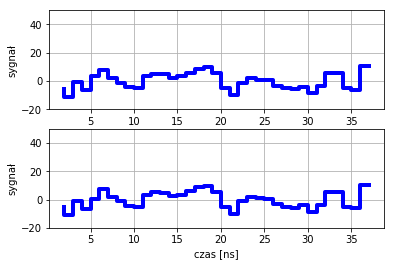

spike b
 i =  76


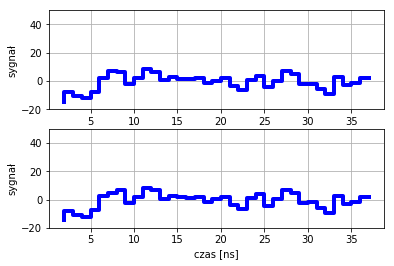

spike b
 i =  77


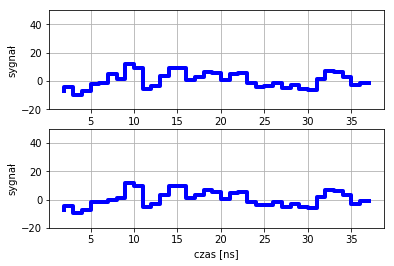

spike b
 i =  78


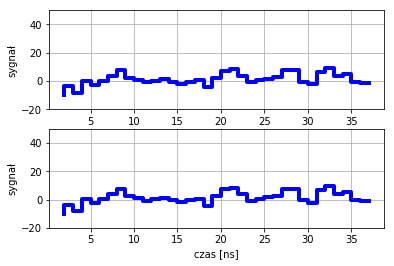

spike b
 i =  79


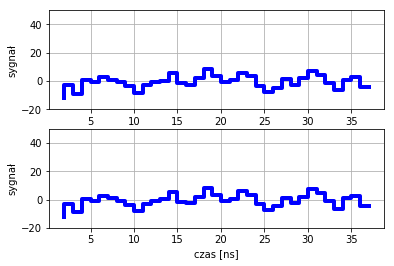

spike b
 i =  80


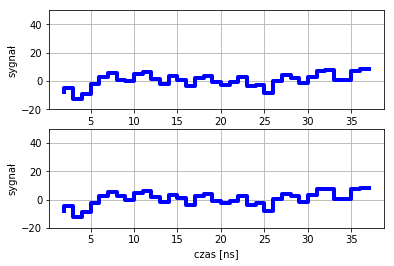

spike b
 i =  81


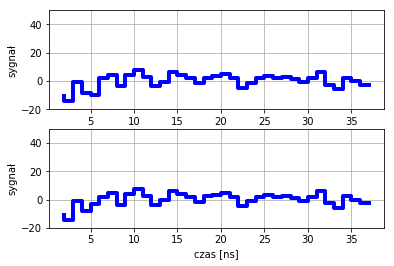

spike b
 i =  82


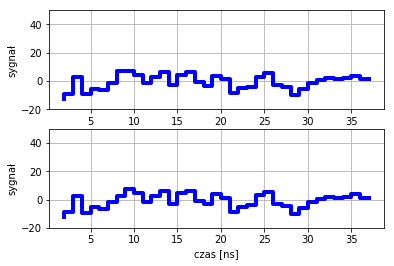

spike b
 i =  83


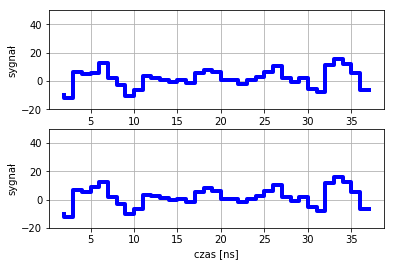

spike b
 i =  84


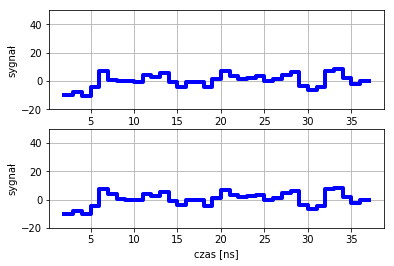

spike b
 i =  85


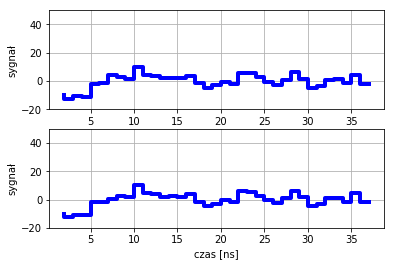

spike b
 i =  86


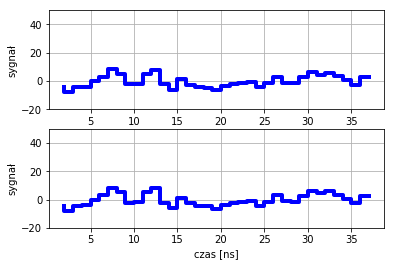

spike b
 i =  87


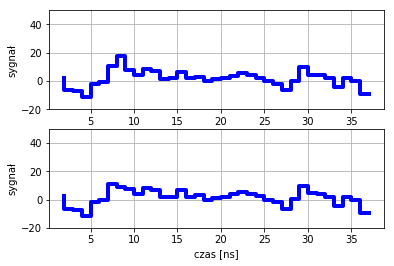

spike b
 i =  88


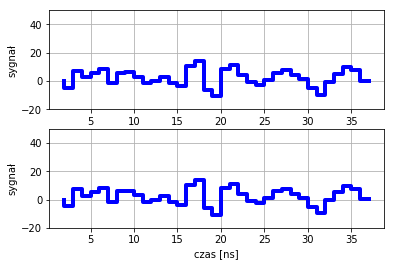

spike b
 i =  89


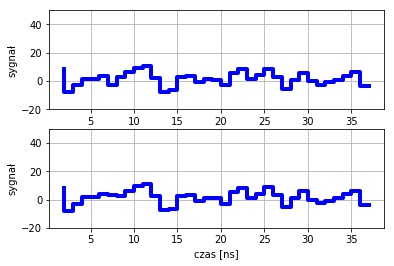

spike b
 i =  90


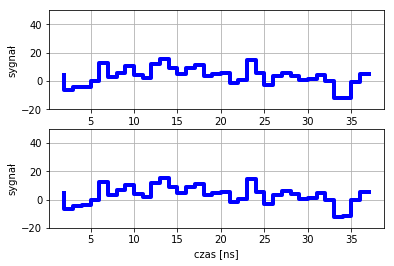

spike b
 i =  91


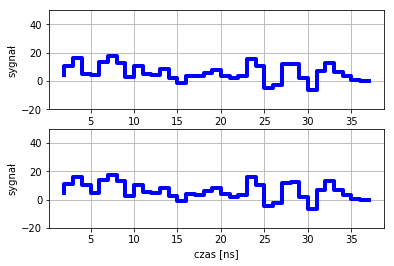

spike b
 i =  92


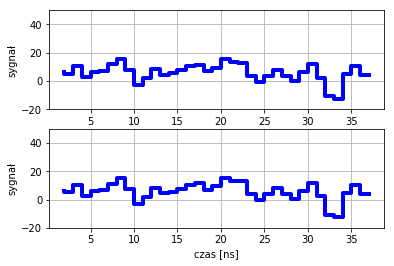

spike b
 i =  93


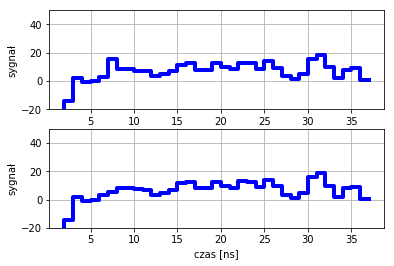

Spike A
i=  152


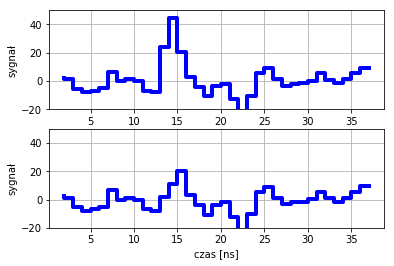

Spike A
i=  153


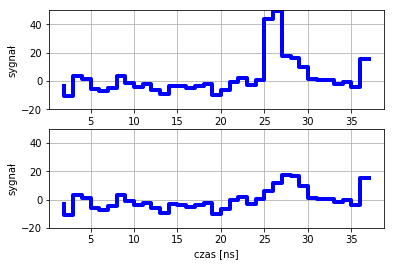

spike b
 i =  190


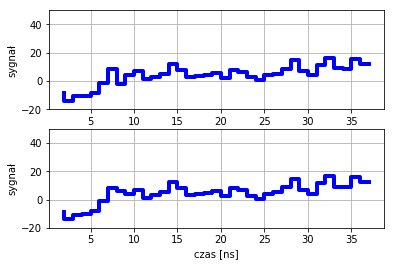

spike b
 i =  191


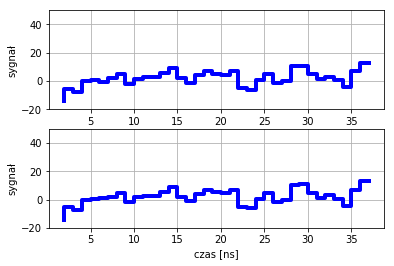

spike b
 i =  192


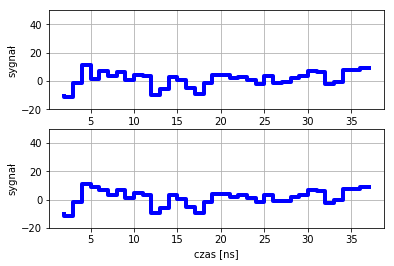

spike b
 i =  193


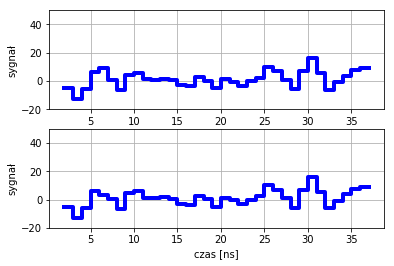

spike b
 i =  194


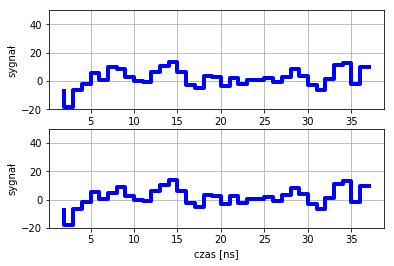

spike b
 i =  195


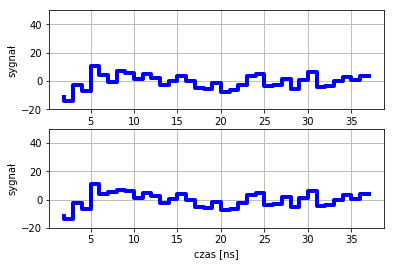

spike b
 i =  196


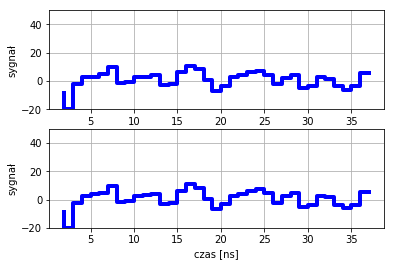

spike b
 i =  197


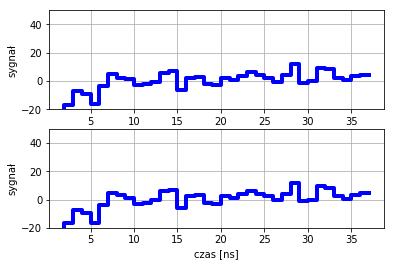

spike b
 i =  198


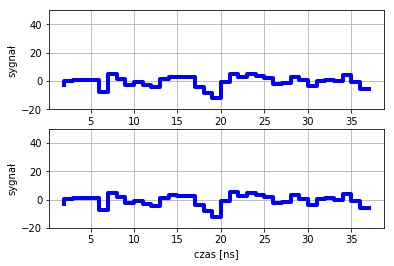

spike b
 i =  199


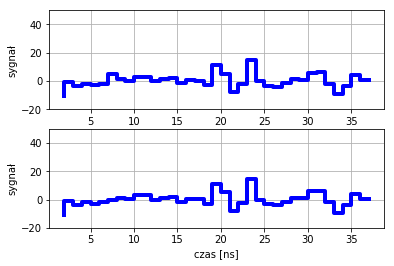

spike b
 i =  200


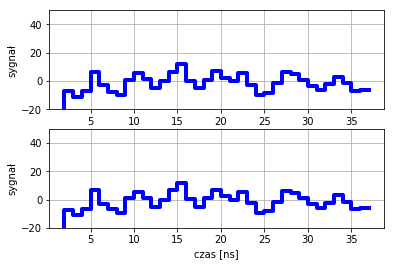

spike b
 i =  201


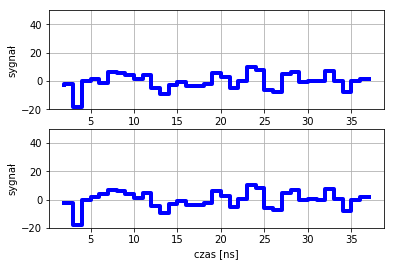

spike b
 i =  202


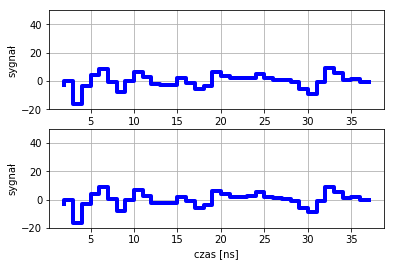

spike b
 i =  203


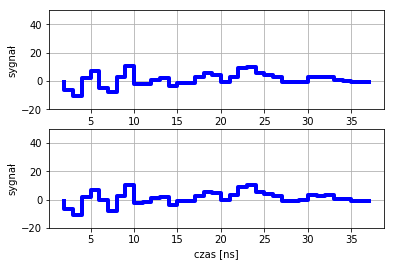

spike b
 i =  204


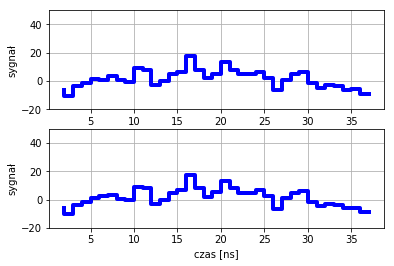

spike b
 i =  205


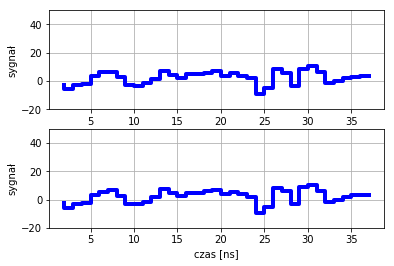

spike b
 i =  206


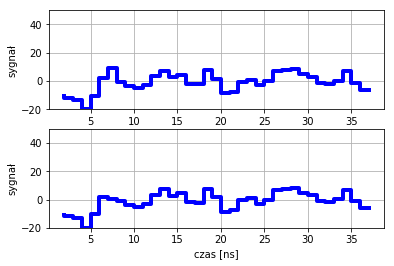

spike b
 i =  207


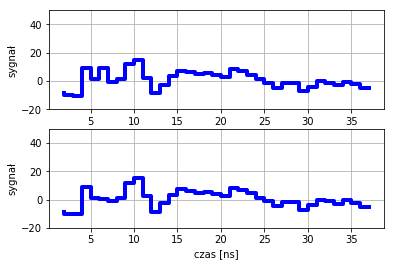

spike b
 i =  208


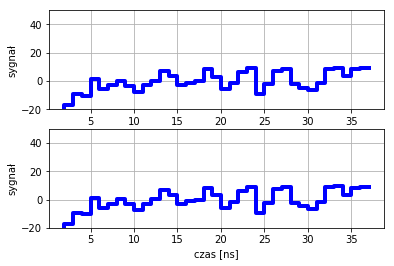

spike b
 i =  209


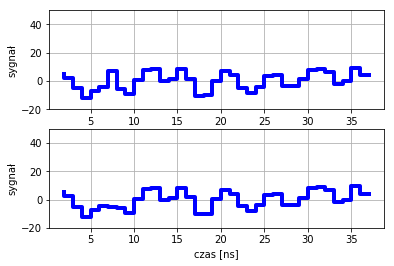

spike b
 i =  210


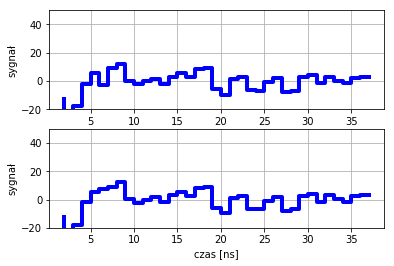

spike b
 i =  211


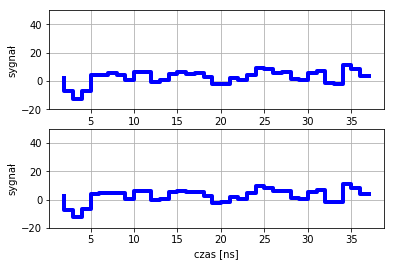

spike b
 i =  212


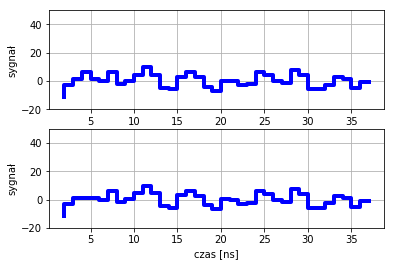

spike b
 i =  213


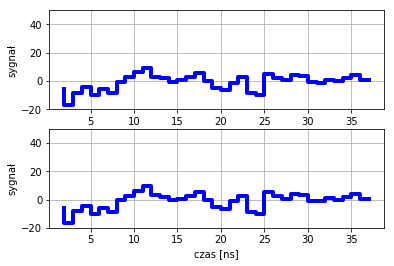

spike b
 i =  214


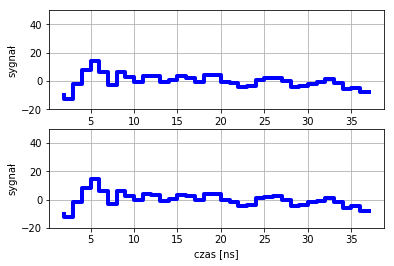

spike b
 i =  215


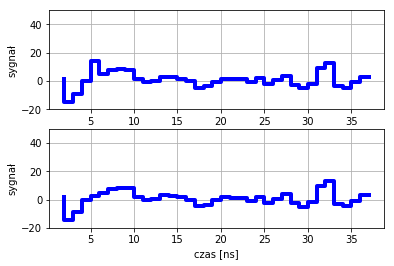

spike b
 i =  216


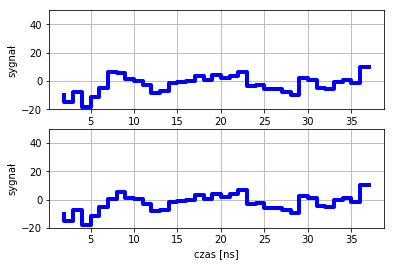

spike b
 i =  217


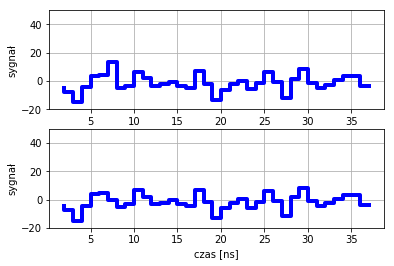

spike b
 i =  218


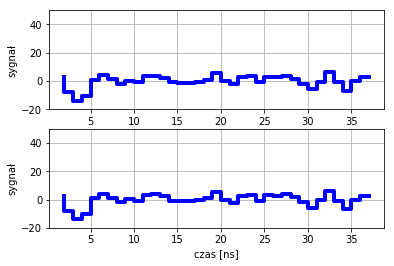

spike b
 i =  219


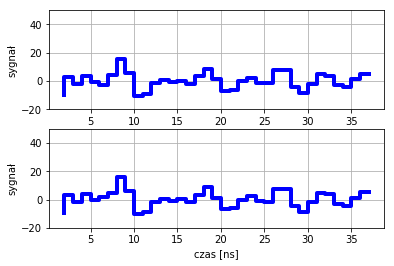

spike b
 i =  220


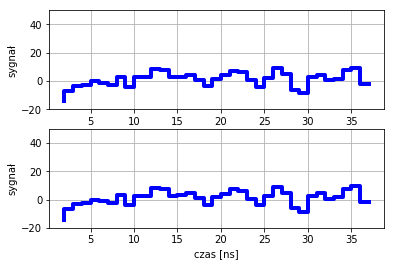

spike b
 i =  221


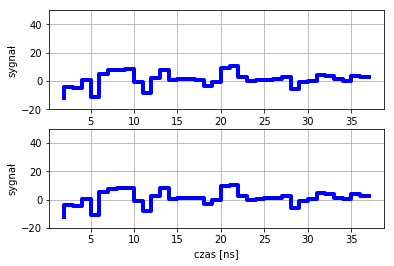

spike b
 i =  222


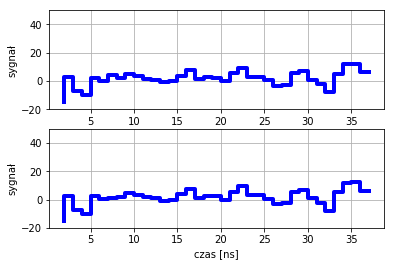

spike b
 i =  223


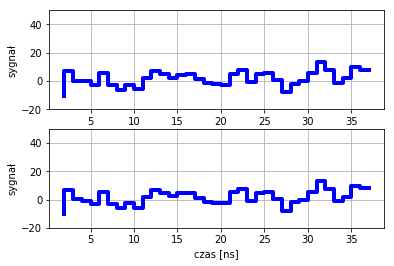

spike b
 i =  224


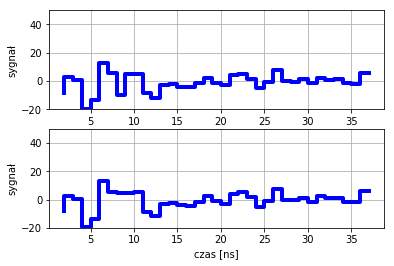

spike b
 i =  225


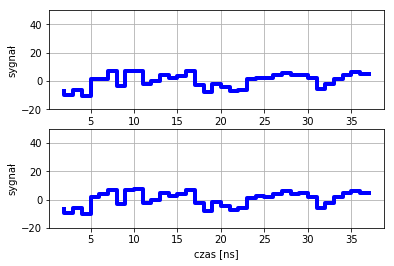

spike b
 i =  226


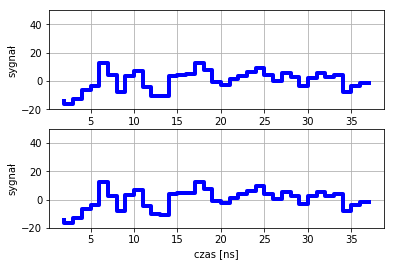

spike b
 i =  227


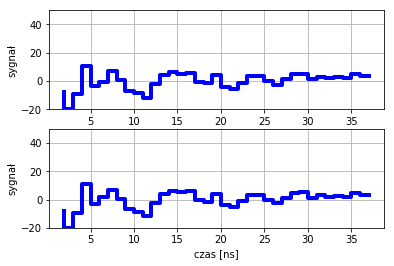

spike b
 i =  228


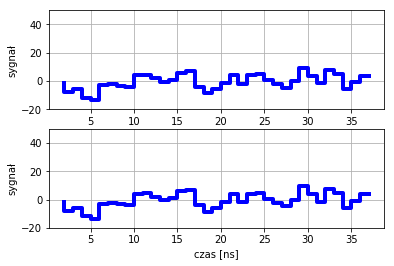

spike b
 i =  229


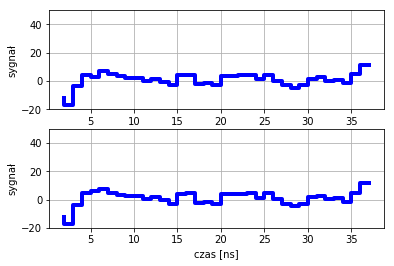

spike b
 i =  230


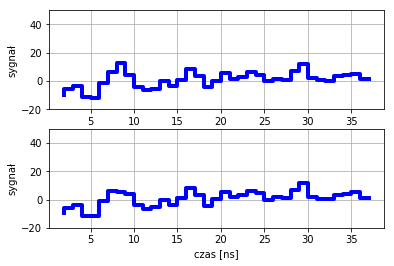

spike b
 i =  231


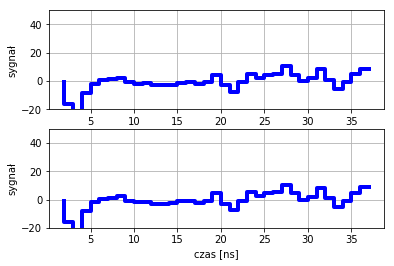

Spike A
i=  232


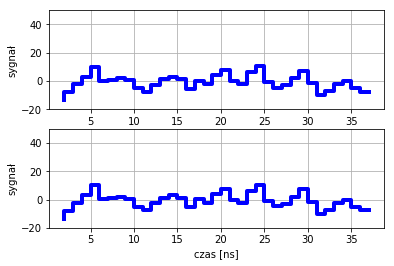

spike b
 i =  232


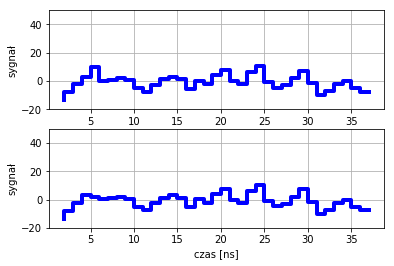

Spike A
i=  233


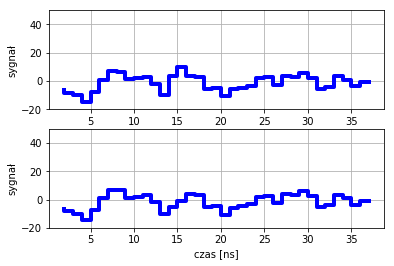

spike b
 i =  233


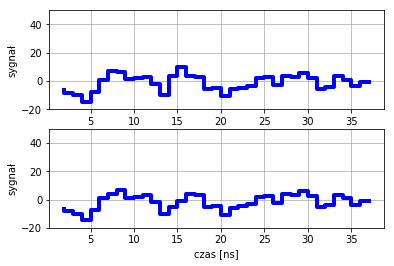

Spike A
i=  234


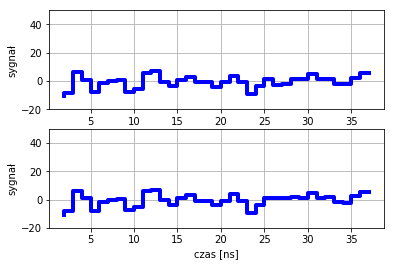

spike b
 i =  234


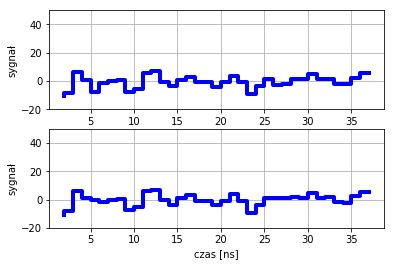

spike b
 i =  235


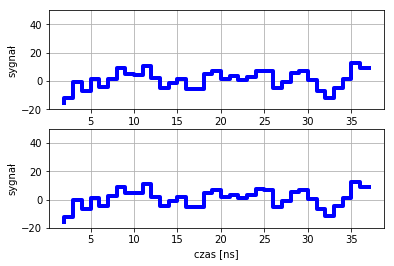

spike b
 i =  236


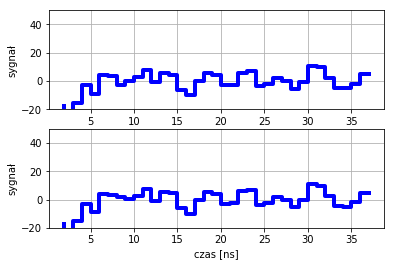

spike b
 i =  237


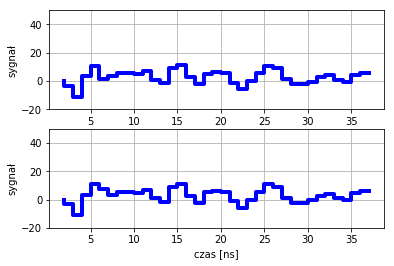

spike b
 i =  238


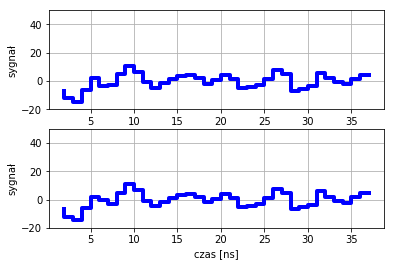

spike b
 i =  239


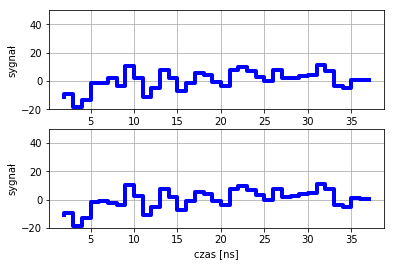

spike b
 i =  240


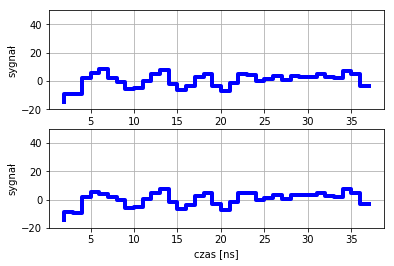

spike b
 i =  241


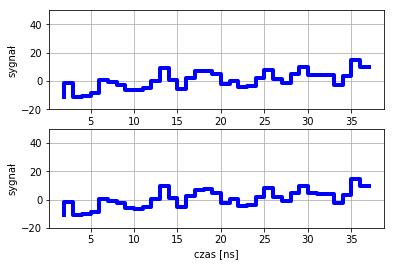

spike b
 i =  242


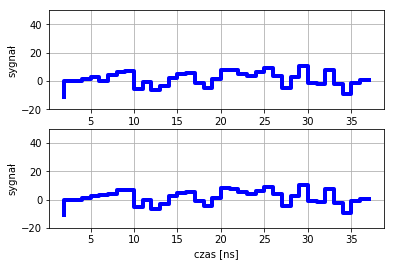

spike b
 i =  243


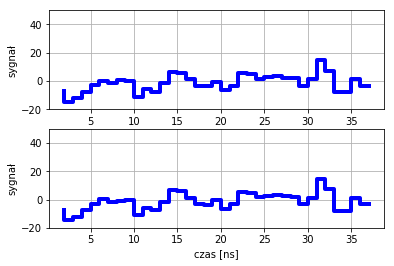

spike b
 i =  244


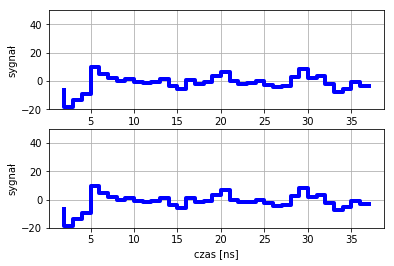

spike b
 i =  245


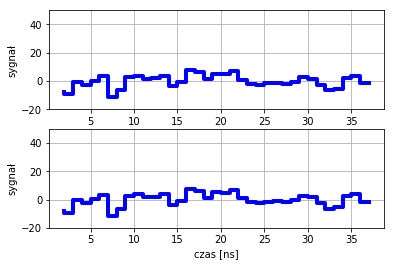

spike b
 i =  246


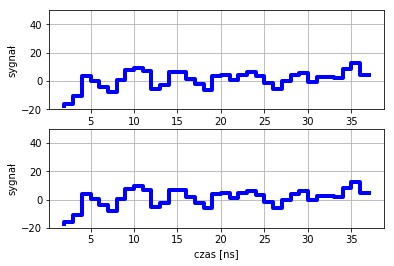

spike b
 i =  247


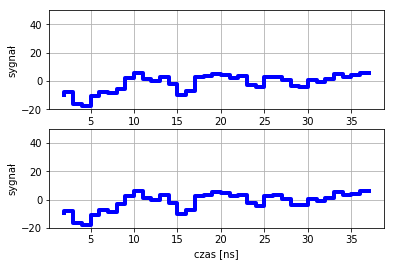

spike b
 i =  248


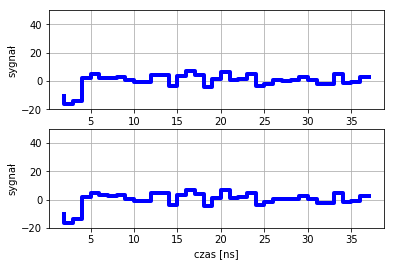

spike b
 i =  249


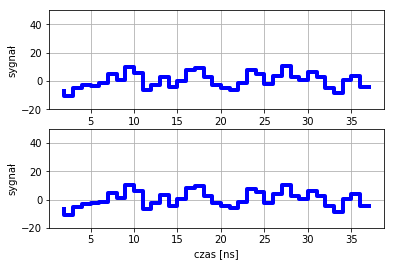

spike b
 i =  250


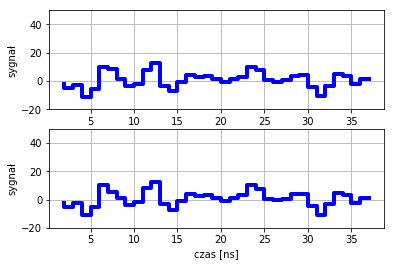

spike b
 i =  251


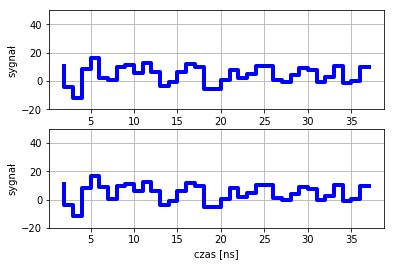

spike b
 i =  252


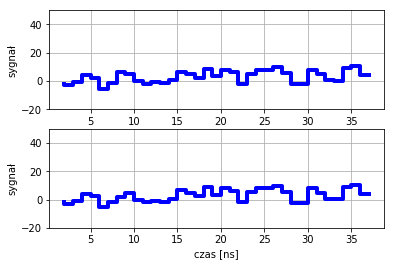

In [4]:
%matplotlib inline
N2 = 300
roisize = 40
size4drs = 4*1024

event_hi_gain_before_remove_pedestal = np.zeros((N2, 8, 40))
event_hi_gain_after_remove_pedestal = np.zeros((N2, 8, 40))
event_hg_after_remove_spike = np.zeros((N2, 8, 40))
fc_hg_old = np.zeros(8)

ev = next(f1.Events)
Ev = Event(ev)
Ev.read()

for i in range(0, N2):
    fc_hg_old = Ev.first_capacitor_high_gain
    ev = next(f1.Events)
    Ev = Event(ev)
    Ev.read()
    event_hi_gain_before_remove_pedestal[i, :, :] = Ev.samples_high_gain[:, :]
    remove_pedestal(Ev, ped)
    

    for j in range(1, 2):
        event_hi_gain_after_remove_pedestal[i, j, :] = Ev.samples_high_gain[j, :]
        event_hg_after_remove_spike[i, j, :] = Ev.samples_high_gain[j, :]
        # looking for spike A
        for k in range(0, 4):
            abspos = int(1024 - roisize-2 - fc_hg_old[j]+ k*1024 +size4drs)
            pos = int((abspos - Ev.first_capacitor_high_gain[j] + size4drs)%size4drs)
            if ((pos > 0) and (pos <= roisize-1)) or (pos == size4drs -1):
               if (pos > 2 and pos < 38): 
                    samples = event_hi_gain_after_remove_pedestal[i, j, :]
                    value1 = samples[pos - 1] + 0.33 * (samples[pos + 2] - samples[pos - 1])
                    value2 = samples[pos - 1] + 0.66 * (samples[pos + 2] - samples[pos - 1])
                    event_hg_after_remove_spike[i, j, pos] = value1
                    event_hg_after_remove_spike[i, j, pos+1] = value2
                    print("Spike A")
                    print("i= ",i)
                    plot_spike(event_hi_gain_after_remove_pedestal[i, j, 2:38], event_hg_after_remove_spike[i, j, 2:38])
                    
        spike_b_pos = int((fc_hg_old[j] - 1 - Ev.first_capacitor_high_gain[j] + 2*size4drs)%size4drs)
        if spike_b_pos < roisize-1:
            print("spike b")
            print(" i = ", i)
            spike_b_pos = spike_b_pos + 2
            samples = event_hi_gain_after_remove_pedestal[i, j, :]
            value = 0.5 * (samples[spike_b_pos - 1] + samples[spike_b_pos + 1])
            event_hg_after_remove_spike[i, j, spike_b_pos] = value
            plot_spike(event_hi_gain_after_remove_pedestal[i, j, 2:38], event_hg_after_remove_spike[i, j, 2:38])
 

In [41]:
%matplotlib qt

plt.rcParams.update({'font.size': 55})

t = np.arange(2, 38, 1)

fig, (ax0, ax1) = plt.subplots(nrows = 2)

ax0.step(t, event_hi_gain_after_remove_pedestal[152, 1, 2:38], 'b-', lw=4)
ax0.set_ylabel("sygnał")
ax0.set_xlabel("czas [ns]")
ax0.set_ylim([-20, 80])
ax0.grid()
ax0.add_patch(
    patches.Arrow(
        8.5,            # x
        42,            # y
        5,            # dx
        0,            # dy
        width=10.2,       # optional - defaults to 1.0
        facecolor="black"
    )
)
ax0.text(5, 51, "Spike typu A")

ax1.step(t, event_hg_after_remove_spike[152, 1, 2:38], 'b-', lw=4)
ax1.set_ylabel("sygnał")
ax1.set_xlabel("czas [ns]")
ax1.set_ylim([-20, 80])
plt.grid(True)
plt.show()


# Histogram

In [ ]:
%matplotlib qt
fig, ax1 = plt.subplots(1, 3, sharey=True)

ax1[0].hist(event_hi_gain_before_remove_pedestal[:, 1, 2:38].ravel(), bins=50, color="blue", lw=3, histtype='step')
mu = np.mean(event_hi_gain_before_remove_pedestal[:, 1, 2:38].ravel())
sigma = np.std(event_hi_gain_before_remove_pedestal[:, 1, 2:38].ravel())
textstr = '$\mu=%.2f$\n $\sigma=%.2f$' % (mu, sigma)
props = dict(boxstyle='round', facecolor='silver', alpha=0.9)
ax1[0].text(0.55, 0.95, textstr, transform=ax1[0].transAxes, fontsize=25, verticalalignment='top', bbox=props)
ax1[0].set_xlabel("sygnał")
ax1[0].set_ylabel("liczba zliczeń")

ax1[1].hist(event_hi_gain_after_remove_pedestal[:, 1, 2:38].ravel(), bins=50, color="blue", lw=3, histtype='step')
mu = np.mean(event_hi_gain_after_remove_pedestal[:, 1, 2:38].ravel())
sigma = np.std(event_hi_gain_after_remove_pedestal[:, 1, 2:38].ravel())
textstr = '$\mu=%.2f$\n $\sigma=%.2f$' % (mu, sigma)
props = dict(boxstyle='round', facecolor='silver', alpha=0.9)
ax1[1].text(0.55, 0.95, textstr, transform=ax1[1].transAxes, fontsize=25, verticalalignment='top', bbox=props)
ax1[1].set_xlabel("sygnał")


ax1[2].hist(event_hg_after_remove_spike[:, 1, 2:38].ravel(), bins=50, color="blue", lw=3, histtype='step')
mu = np.mean(event_hg_after_remove_spike[:, 1, 2:38].ravel())
sigma = np.std(event_hg_after_remove_spike[:, 1, 2:38].ravel())
textstr = '$\mu=%.2f$\n $\sigma=%.2f$' % (mu, sigma)
props = dict(boxstyle='round', facecolor='silver', alpha=0.9)
ax1[2].text(0.55, 0.95, textstr, transform=ax1[2].transAxes, fontsize=25, verticalalignment='top', bbox=props)
ax1[2].set_xlabel("sygnał")

ax1[0].grid(True)
ax1[1].grid(True)
ax1[2].grid(True)
plt.show()

In [35]:
%matplotlib qt
fig, ax1 = plt.subplots(1, 2, sharey=True)

ax1[0].hist(event_hi_gain_before_remove_pedestal[:, 1, 2:38].ravel(), bins=50, color="blue", lw=4, histtype='step')
mu = np.mean(event_hi_gain_before_remove_pedestal[:, 1, 2:38].ravel())
sigma = np.std(event_hi_gain_before_remove_pedestal[:, 1, 2:38].ravel())
textstr = '$\mu=%.2f$\n $\sigma=%.2f$' % (mu, sigma)
props = dict(boxstyle='round', facecolor='silver', alpha=0.9)
ax1[0].text(0.65, 0.95, textstr, transform=ax1[0].transAxes, fontsize=35, verticalalignment='top', bbox=props)
ax1[0].set_xlabel("sygnał")
ax1[0].set_ylabel("liczba zliczeń")

ax1[1].hist(event_hi_gain_after_remove_pedestal[:, 1, 2:38].ravel(), bins=50, color="blue", lw=4, histtype='step')
mu = np.mean(event_hi_gain_after_remove_pedestal[:, 1, 2:38].ravel())
sigma = np.std(event_hi_gain_after_remove_pedestal[:, 1, 2:38].ravel())
textstr = '$\mu=%.2f$\n $\sigma=%.2f$' % (mu, sigma)
props = dict(boxstyle='round', facecolor='silver', alpha=0.9)
ax1[1].text(0.55, 0.95, textstr, transform=ax1[1].transAxes, fontsize=35, verticalalignment='top', bbox=props)
ax1[1].set_xlabel("sygnał")


ax1[0].grid(True)
ax1[1].grid(True)
plt.show()

# Plot substract pedestal for one channel

In [ ]:
%matplotlib qt
plt.rcParams.update({'font.size': 35})

t = np.arange(2, 38, 1)

fig, (ax0, ax1) = plt.subplots(nrows = 2)

ax0.step(t, event_hi_gain_before_remove_pedestal[3, 1, 2:38], 'b-', lw=4)
ax0.set_ylabel("sygnał")
ax0.set_xlabel("czas [ns]")
ax0.axhline(color='k', lw=1)
ax0.set_ylim([200, 400])
ax0.grid()

ax1.step(t, event_hi_gain_after_remove_pedestal[3, 1, 2:38], 'b-', lw=4)
ax1.set_ylabel("sygnał")
ax1.set_xlabel("czas [ns]")
ax1.set_ylim([-100, 100])
plt.grid(True)
plt.show()


In [ ]:


y1 = event_hi_gain_after_remove_pedestal[:, 1, 2:38].ravel()
y2 = event_hi_gain_before_remove_pedestal[:, 1, 2:38].ravel()
y3 = event_hg_after_remove_spike[:, 1, 2:38].ravel()
z1 = (y1 - np.mean(y1))/np.std(y1)
z2 = (y2 - np.mean(y2))/np.std(y2)
z3 = (y3 - np.mean(y3))/np.std(y3)
plt.figure()
plt.hist(z1/max(z1), bins=50,  histtype='step')
plt.hist(z2/max(z2), bins=50,  histtype='step')
plt.hist(z3/max(z3), bins=50,  histtype='step')
plt.show()